In [ ]:
###############################################################
#  Implementación numérica del Modelo de Zener.
#  Miriam Gutiérrez UDC
###############################################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import mpmath as mp

# Parámetros del modelo
K = 1  # módulo elástico del resorte en serie
G = 1   # módulo de viscosidad
a = 10.0  # parámetro de regularización

In [2]:
# Función escalón regularizada y su derivada (fuerza aplicada)
def heavisidereg(t, a):
    return 0.5 * (1.0 + np.tanh(a * t))

def deltareg(t, a):
    return a / (2.0 * np.cosh(a * t)**2)

def force(t):
    eps = 1e-2
    return heavisidereg(t, 1/eps)

def dforce(t):
    eps = 1e-2
    return deltareg(t, 1/eps)

# Ecuaciones diferenciales del modelo de Zener
def zener(t, y, K, G, a):
    x0, x1 = y
    f = force(t)
    fp = dforce(t)
    dx0 = f / (K * G)
    dx1 = (f + fp - K*x1) / (1 + K)
    return [dx0, dx1]

In [3]:
# Condiciones iniciales
y0 = [0.0, 0.0]
t_span = (-1, 10)
t_eval = np.linspace(*t_span, 1000)

# Solución numérica del sistema
sol = solve_ivp(zener, t_span, y0, args=(K, G, a), t_eval=t_eval)

# Solución analítica vía Laplace
def zeners_laplace(s, K):
    xt1 = (1 + 1/s) / (s * (1 + K) + K)
    return xt1

t_analitico = np.linspace(1e-3, 10, 1000)
x1_analitica = [mp.invertlaplace(lambda s: zeners_laplace(s, K), ti, method='talbot') for ti in t_analitico]


<ipython-input-2-983aed7d7978>:6: RuntimeWarning: overflow encountered in scalar power
  return a / (2.0 * np.cosh(a * t)**2)
<ipython-input-2-983aed7d7978>:6: RuntimeWarning: overflow encountered in cosh
  return a / (2.0 * np.cosh(a * t)**2)


In [4]:
# Parámetros del modelo spring-pot
ksp = 1.0       # constante elástica
etasp = 1.0     # viscosidad
csp = 1.0       # parámetro del spring-pot
betasp = 0.5    # orden fraccionario

# Transformada de Laplace del desplazamiento x1(s)
def springpots(s):
    xs =  1 / (ksp + (etasp*s*csp*s**betasp)/(s*etasp + csp*s**betasp))
    return 1/s * xs

# Invertimos la transformada con método de Talbot
t_vals = np.linspace(1e-3, 10, 1000)
x1_vals = [mp.invertlaplace(springpots, t, method='talbot') for t in t_vals]


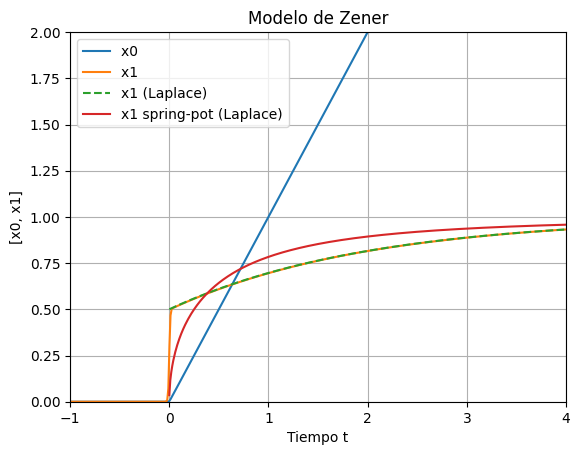

In [5]:
# Graficamos la comparación
plt.plot(sol.t, sol.y[0], label='x0 ')
plt.plot(sol.t, sol.y[1], label='x1 ')
plt.plot(t_analitico, x1_analitica, '--', label='x1 (Laplace)')
plt.plot(t_vals, x1_vals, label='x1 spring-pot (Laplace)')
plt.xlim(-1, 4)
plt.ylim(0, 2)
plt.xlabel('Tiempo t')
plt.ylabel('[x0, x1]')
plt.title('Modelo de Zener')
plt.legend()
plt.grid(True)
plt.show()